In [11]:
from utilities import *
import GetTranscription

In [12]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

In [13]:
clips =fcs.get_audio_files(libri_train)
len(clips)

28539

clips in dataset:  28539
hop_length:  80
transcription:  HAD IT BEEN ANY OTHER MAN IN AVONLEA MISSUS RACHEL DEFTLY PUTTING THIS AND THAT TOGETHER MIGHT HAVE GIVEN A PRETTY GOOD GUESS AS TO BOTH QUESTIONS BUT MATTHEW SO RARELY WENT FROM HOME THAT IT MUST BE SOMETHING PRESSING AND UNUSUAL WHICH WAS TAKING HIM
words:  46
(243040,)


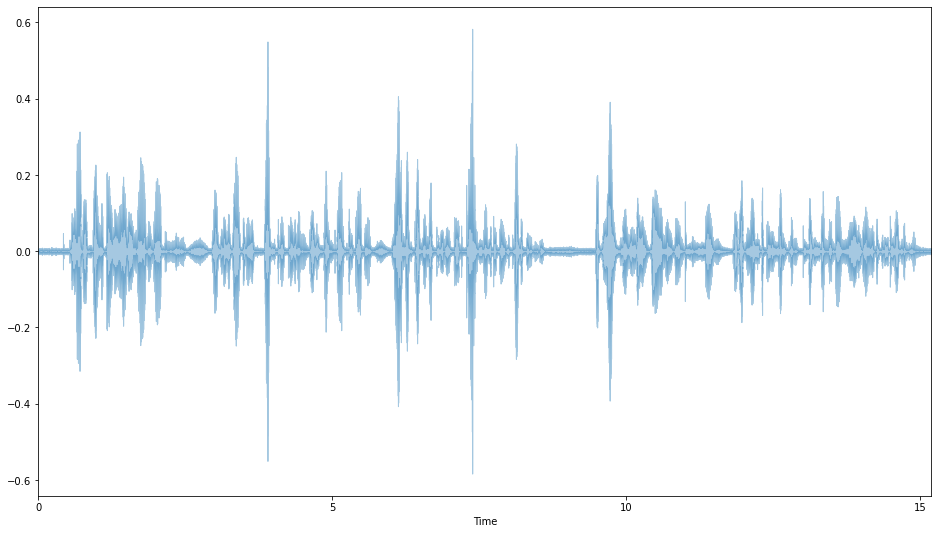

In [14]:
plt.figure(figsize=(16,9))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
min_duration=hop_length*10

clips = fcs.get_audio_files(libri_train)
clip = clips[12]
audio, sr = librosa.load(clip, sr=sr)
transcription = GetTranscription.get_file_transcript(clip)
print("clips in dataset: ", len(clips))
print("hop_length: " ,hop_length)
print("transcription: ", transcription)
print("words: ", len(transcription.split(" ")))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio, rate=sr)

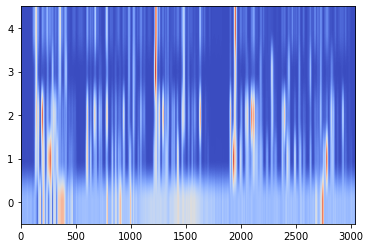

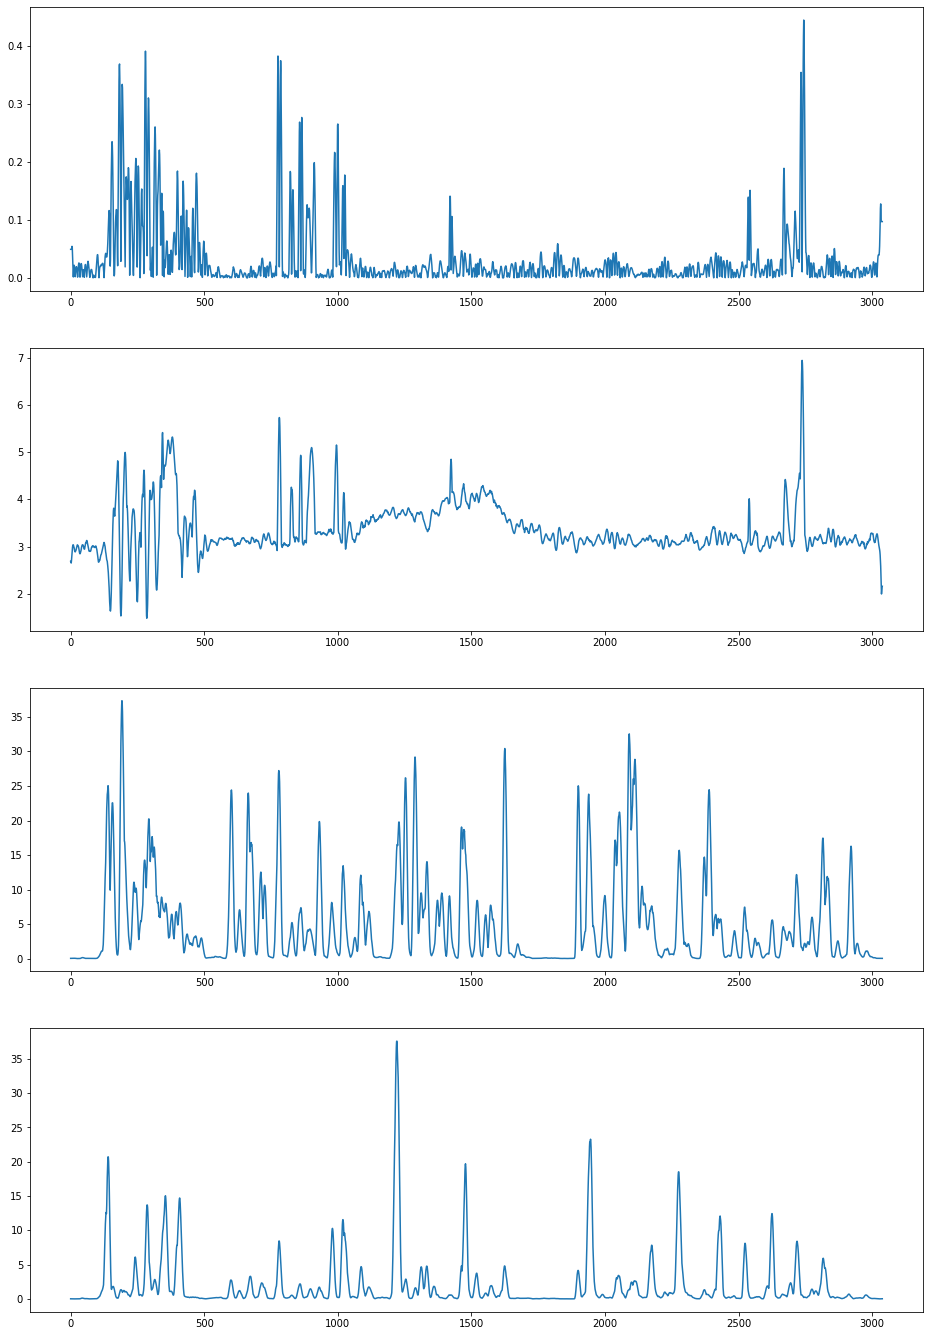

In [15]:
spectral_contrast = librosa.feature.spectral_contrast(audio, sr=sr , n_bands= 4 ,
                                                      hop_length = hop_length, linear = True, quantile = 0.001)

#print(spectral_contrast.shape , audio.shape ,"\n\n", spectral_contrast[0][0:100],"\n\n",spectral_contrast[1][0:100] )
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
fig = plt.figure(figsize = (16,24))
ax =fig.subplots(4)
ax[0].plot(np.abs(librosa.feature.delta(spectral_contrast[0])))
ax[1].plot(spectral_contrast[0])
ax[2].plot(spectral_contrast[2])
ax[3].plot(spectral_contrast[3])

In [115]:
from preprocessing import *
segments = Split(audio, hop_length,frame_length,sr, min_duration=70)
#segments

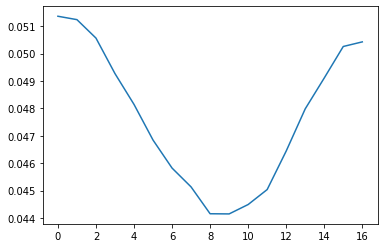

In [168]:
segment = segments[1]
start,end  = segment[0] , segment[1]
section = audio[start:end]
sec_energy = librosa.feature.rms(np.abs(section), hop_length=80)[0]
s_avg =  np.average(sec_energy)
s_max = np.argmax(sec_energy)
bins = np.array([0,s_avg])
plt.plot(sec_energy)
binned = np.digitize(sec_energy,bins)
#print(binned[500:550])
#print(type(binned))
ipd.Audio(section, rate=sr)
#ipd.Audio(section[hop_length*0:hop_length*12], rate=sr)
ipd.Audio(section[hop_length*14:len(section)], rate=sr)

array([[   0,  960],
       [1120, 2720]], dtype=int64)

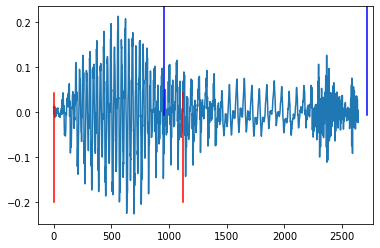

In [165]:
from scipy import signal
mins = signal.argrelextrema(sec_energy, np.less)
maxs = signal.argrelextrema(sec_energy, np.greater)
if mins[0]<maxs[0]:
    maxs= np.insert(maxs,0,0)
    mins= np.append(mins,len(sec_energy))
tups = list(zip(maxs,mins ))
plt.plot(section)
for t in tups:
    plt.axvline(x=t[0]*hop_length , ymin=0.1, ymax=0.6, c='r' )
    plt.axvline(x=t[1]*hop_length , ymin=0.5, ymax=1, c='b' )
tups
np.array(tups)*hop_length

In [ ]:
sr, hop_length , len(section)

ParameterError: when mode='interp', width=9 cannot exceed data.shape[axis]=8

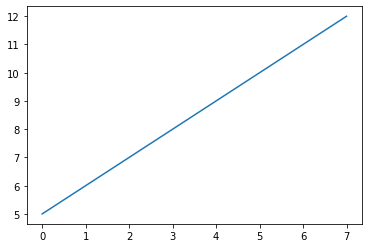

In [171]:
#np.mean(audio[start:end])

ones =  np.array(np.where(binned==1))[0]
plt.plot(ones)
plt.plot(librosa.feature.delta(ones)[0])
print(ones)
endings = []
for i in  range(len(ones)-1):
    if ones[i]+1 != ones[i+1]:
        endings.append(ones[i])

#bits =list(zip(beginnings, endings))
print( ones, len(endings),endings)

In [92]:
all_bits = []
for segment in segments:
    starting = segment[0]
    segment_boundaries = Split3(audio[starting:segment[1]], hop_length=hop_length,
                                     sr=sr, min_duration=500)
    for bit in segment_boundaries:
        x1 = starting + bit[0]
        x2 = starting + bit[1]
        b = (x1, x2)
        all_bits.append(b)

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1280
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2000
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1760
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1120
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1840
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1680
  w

In [5]:
def load_clip(clip_address, sr):
    audio, sr = librosa.load(clip_address, sr=sr)
    return audio
def load_clip_transcription(clip_address):
    transcription = GetTranscription.get_file_transcript(clip_address)
    return transcription

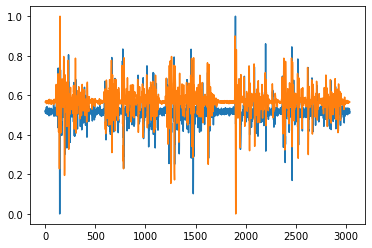

In [6]:
f = librosa.feature.rms(audio,hop_length=hop_length, frame_length= frame_length).flatten()
d = librosa.feature.delta(f)
rmse_diff = np.zeros_like(f)
rmse_diff[1:] = np.diff(f)
d_diff = np.zeros_like(d)
d_diff[1:] = np.diff(d)

plt.plot(normalize(rmse_diff))
plt.plot(normalize(d_diff))

In [7]:
audio.shape
#n.shape
hop_length

80

In [8]:
#Split by silence

from energy_split import *
def split_into_segments(audio,hop_length,frame_length,sr,min_voiced_duration_ms=50, energy_threshold=0.05):
    segments = Split(audio,hop_length,frame_length,sr ,min_duration, energy_threshold)
    return segments
print(len(segments))
print(segments)

total = 0
for x in segments:
    total += x[1]-x[0]
print("...",total)
audio.shape

SyntaxError: positional argument follows keyword argument (<ipython-input-8-333628ee9e48>, line 5)

In [4]:
print(get_phonemes_for_word("computer"))

MatchPhonesToText("kəmpju:ter")

kəmpjuːtɐ


[]

In [1]:
from m_dictionary import *
def all_phones_to_array(transcription):
    clip_phones = get_phonemes_for_sentence(sentence = transcription)
    phone_array = []
    for word in clip_phones:
        if len(word) == word.count(' '):
            phone_array.append('XXXXXX')
        if len(word) != word.count(' '):
            #print(len(word))
            #print(word)
            for char in word:
                if char =='ː':
                    phone_array[-1] = phone_array[-1]+char
                else:
                    phone_array.append(char)
    return phone_array
print(phone_array)
print(transcription)
print(sectionphones)
len(phone_array)

NameError: name 'phone_array' is not defined

In [ ]:
def all_phoneme_Sections_in_clip(segments):
    all_bits = []
    for segment in segments:
        starting = segment[0]
        segment_boundaries = Split2(audio[starting:segment[1]], hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
        for bit in segment_boundaries:
            x1 =starting+bit[0]
            x2 =starting+bit[1]
            b = (x1,x2)
            all_bits.append(b)
    return all_bits
print(all_bits)
print("segmented phones: ", len(all_bits),"transcription phones: ",len(phone_array))
print(np.median([x[1]-x[0] for x in all_bits]))   

In [ ]:
def clip_from_segments(segments):
    voiced = []
    for x in segments:
        silenced[x[0]:x[1]] = audio[x[0]:x[1]]
        for i in audio[x[0]:x[1]]:
            voiced.insert( len(voiced),i )
    voiced = np.array(voiced)
    print(voiced.shape)
    return voiced
audio_voiced = clip_from_segments(segments)
ipd.Audio(audio_voiced,rate=sr)

In [ ]:
# checking segment audio
selected = 2
section = segments[selected]
section_data = audio[section[0]:section[1]]
print(section_data.shape)
print(section)

normed = normalize(librosa.feature.rms(audio[section[0]:section[1]], hop_length=hop_length,
                            frame_length=frame_length).flatten())
librosa.display.waveplot(section_data, sr=sr)
ipd.Audio(section_data, rate=sr)


In [ ]:
#split by rate of change of energy
section = segments[selected]
part = audio[section[0]:section[1]]
phone_boundaries = Split2(part, hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*10)
print(len(part))
#phone_boundaries.append(len(part))
print(hop_length*6)
print(part.shape)
print(phone_boundaries)
print(len(phone_boundaries))

In [ ]:
phone_boundaries[-1]

In [ ]:
mnum =2
librosa.display.waveplot(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], sr=sr)
ipd.Audio(part[phone_boundaries[mnum][0]:phone_boundaries[mnum][1]], rate=sr)


In [ ]:
section = segments[selected]
part = audio[section[0]:section[1]]
e =librosa.pcen(part,hop_length=hop_length)
d = normalize(librosa.feature.delta(e))
print(len(e))
print(part.shape)
print(len(d))
#librosa.display.waveplot(part)
plt.plot(d)
plt.plot(part)
a = 2800
b = 4200
for x in phone_boundaries:
    plt.axvline(x=x[0], ymin=-0.4, ymax=1, c='b', alpha=0.3)
    plt.axvline(x=x[1], ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.axvline(x=b, ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.show()
stft = librosa.stft(part[a:b])
librosa.display.specshow(stft, y_axis="log", x_axis="linear")
ipd.Audio(part[a:b], rate =sr)

In [ ]:
plt.figure(figsize=(24,12))
plt.plot(audio)
for x in segments:
    x1 = x[0]
    x2 = x[1]
    plt.bar(x1, height=1.5, width=(x2-x1), bottom=-0.75, alpha=0.2)
    

In [ ]:
e2 = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), frame_length)
])

audio.shape[0]/e2.shape[0]
plt.plot(e2)

In [ ]:
segments_librosa = librosa.effects.split(audio,  frame_length=2048, hop_length=220)
voiced_libr = []
for x in segments_librosa:
    silenced[x[0]:x[1]] = audio[x[0]:x[1]]
    for i in audio[x[0]:x[1]]:
        voiced_libr.insert( len(voiced_libr),i )
voiced_libr = np.array(voiced_libr)
print(voiced_libr.shape)


print("transcription: ", transcription)
ipd.Audio(voiced,rate=sr)

In [ ]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(voiced, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(voiced),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(voiced),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(voiced),0.8)
y3 = np.full(len(voiced),0.15)
energy = librosa.pcen(np.array(voiced))
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




In [ ]:
stft = librosa.stft(np.array(audio), hop_length=hop_length)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

In [ ]:
def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

In [ ]:
from scipy import signal
def f_high(y,sr):
    b,a = signal.butter(1, 2000/(sr/2), btype='lowpass')
    yf = signal.lfilter(b,a,y)
    return yf
yf1 = f_high(audio, sr)
ipd.Audio(yf1,rate=sr)

In [ ]:
audio = yf1

In [ ]:
a_file= open("test.txt","w")
np.savetxt(a_file, three)
a_file.close()